In [1]:
import numpy as np
import pandas as pd
print(pd.__version__)
print(np.__version__)

0.24.2
1.16.4


In [5]:
data=pd.read_csv('water.txt', sep='\t')

In [6]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [10]:
data.iloc[:,0]

0     South
1     North
2     South
3     North
4     North
5     North
6     North
7     South
8     North
9     South
10    South
11    North
12    South
13    South
14    South
15    North
16    North
17    North
18    South
19    South
20    North
21    North
22    North
23    North
24    North
25    South
26    North
27    South
28    North
29    North
      ...  
31    North
32    South
33    South
34    South
35    North
36    North
37    South
38    South
39    South
40    North
41    South
42    North
43    North
44    North
45    North
46    North
47    South
48    South
49    North
50    North
51    North
52    North
53    North
54    South
55    North
56    South
57    South
58    South
59    South
60    North
Name: location, Length: 61, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000069EA668>,
      dtype=object)

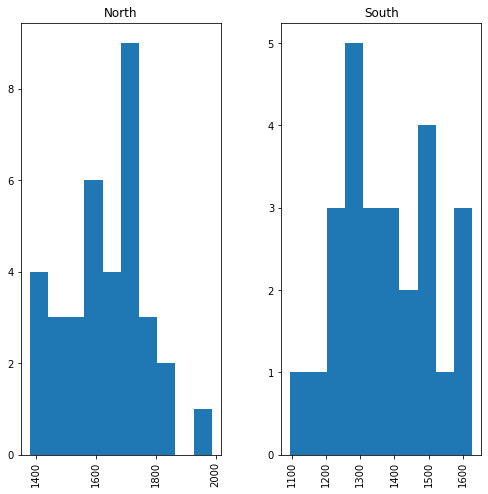

In [15]:
data.hist(column='mortality', by='location', figsize=(8,8))

In [12]:
import matplotlib
%matplotlib inline

In [20]:
mean_mortality=data.iloc[:,2].mean()

In [39]:
std_mortality=data.iloc[:,2].std(ddof=1)

In [40]:
print(mean_mortality-2*std_mortality)

1148.8100331206924


Задание 3

In [30]:
df_south=data.loc[lambda data: data['location']=='South']

In [51]:
mean_mortality=data.iloc[:,2].mean()
std_mortality=data.iloc[:,2].std()
p_i(z, std_mortality, len(data.iloc[:,2]), mean_mortality)

Lower:  1477.05259956449
Upper:  1571.2424824027232


In [50]:
z=1.95996

In [44]:
def p_i(z, sigma, n, mean):
    print('Lower: ' , mean-z*sigma/np.sqrt(n))
    print('Upper: ' , mean+z*sigma/np.sqrt(n))

In [52]:
mean_mortality1=df_south.iloc[:,2].mean()
std_mortality1=df_south.iloc[:,2].std()
#print(mean_mortality1-2*std_mortality1)
#print(mean_mortality1+2*std_mortality1)
p_i(z, std_mortality1, len(df_south.iloc[:,2]), mean_mortality1)

Lower:  1322.891057534682
Upper:  1430.7243270807028


In [46]:
df_north=data.loc[lambda data: data['location']=='North']
mean_mortality2=df_north.iloc[:,2].mean()
std_mortality2=df_north.iloc[:,2].std()
p_i(z, std_mortality2, len(df_north.iloc[:,2]), mean_mortality2)

Lower:  1588.2327372553602
Upper:  1678.9672627446396


Задание 5

In [47]:
mean_hardness1=df_south.iloc[:,3].mean()
std_hardness1=df_south.iloc[:,3].std()
p_i(z, std_hardness1, len(df_south.iloc[:,2]), mean_hardness1)

Lower:  54.25508424908598
Upper:  85.28337728937557


In [48]:
mean_hardness2=df_north.iloc[:,3].mean()
std_hardness2=df_north.iloc[:,3].std()
p_i(z, std_hardness2, len(df_north.iloc[:,2]), mean_hardness2)

Lower:  21.741629986301252
Upper:  39.05837001369875


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000913AB70>,
      dtype=object)

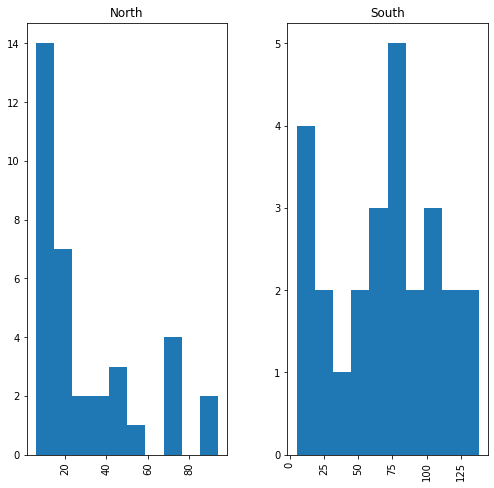

In [37]:
data.hist(column='hardness', by='location', figsize=(8,8))

Задание 6

In [38]:
alpha=0.95
sigma=1.0
z=1.96
e=0.1
n=(z*sigma/e)**2
print(n)

384.1599999999999


Доверительный интервал через scipy.stats

In [53]:
import scipy.stats as ss

In [54]:
def mean_conf(data, confidence=0.95):
    a=1.0*np.array(data)
    n=len(a)
    m, se = np.mean(a), ss.sem(a)
    h=se*ss.t._ppf((1+confidence)/2., n-1)
    print('C_u: ', m+h)
    print('C_l: ', m-h)

In [55]:
mean_conf(data.iloc[:,2])
mean_conf(df_south.iloc[:,2])

C_u:  1572.2117406119285
C_l:  1476.0833413552848
C_u:  1433.463638321761
C_l:  1320.1517462936238
